In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [27]:
from itertools import count
df = pd.read_csv('/content/IDs_mapping.csv')
df2 = pd.read_csv('/content/readmission.csv')
my_med = df2.loc[:,'nateglinide':'pioglitazone']
my_med.head()

,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone
0,No,No,No,No,No,No,No,No
1,No,No,No,No,No,No,No,No
2,No,No,No,No,Steady,No,No,No
3,No,No,No,No,No,No,No,No
4,No,No,No,No,Steady,No,No,No


In [28]:
print(my_med.isnull().sum())

nateglinide       0
chlorpropamide    0
glimepiride       0
acetohexamide     0
glipizide         0
glyburide         0
tolbutamide       0
pioglitazone      0
dtype: int64


In [4]:
print (my_med.stack().unique())

['No' 'Steady' 'Up' 'Down']


In [30]:
my_med['nateglinide'].unique()

array(['No', 'Steady', 'Down', 'Up'], dtype=object)

In [35]:
prescription_mapping = {'Down':1, 'Up':1, 'Steady':1, 'No':0}
my_med['nateglinide'] = my_med['nateglinide'].replace(prescription_mapping)
my_med['chlorpropamide'] = my_med['chlorpropamide'].replace(prescription_mapping)
my_med.sum()

nateglinide                                                     703
chlorpropamide                                                   86
glimepiride       NoNoNoNoNoNoSteadyNoNoNoNoNoNoNoNoNoNoNoNoNoNo...
acetohexamide     NoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNo...
glipizide         NoNoSteadyNoSteadyNoNoNoSteadyNoNoNoNoNoNoNoSt...
glyburide         NoNoNoNoNoNoNoSteadyNoNoNoUpNoNoNoNoNoSteadyNo...
tolbutamide       NoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNo...
pioglitazone      NoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNo...
dtype: object

In [15]:
pivot_table = my_med.apply(lambda x: x.value_counts()).fillna(0).astype(int).T
pivot_table.columns = ['No', 'Steady','Up','Down']
pivot_table

,No,Steady,Up,Down
nateglinide,11,101063,668,24
chlorpropamide,1,101680,79,6
glimepiride,194,96575,4670,327
acetohexamide,0,101765,1,0
glipizide,560,89080,11356,770
glyburide,564,91116,9274,812
tolbutamide,0,101743,23,0
pioglitazone,118,94438,6976,234


In [40]:
my_med.replace({'No': 0,'Steady':1,'Up':1,'Down': 1}, inplace=True)
my_med.sum()


nateglinide         703
chlorpropamide       86
glimepiride        5191
acetohexamide         1
glipizide         12686
glyburide         10650
tolbutamide          23
pioglitazone       7328
dtype: int64

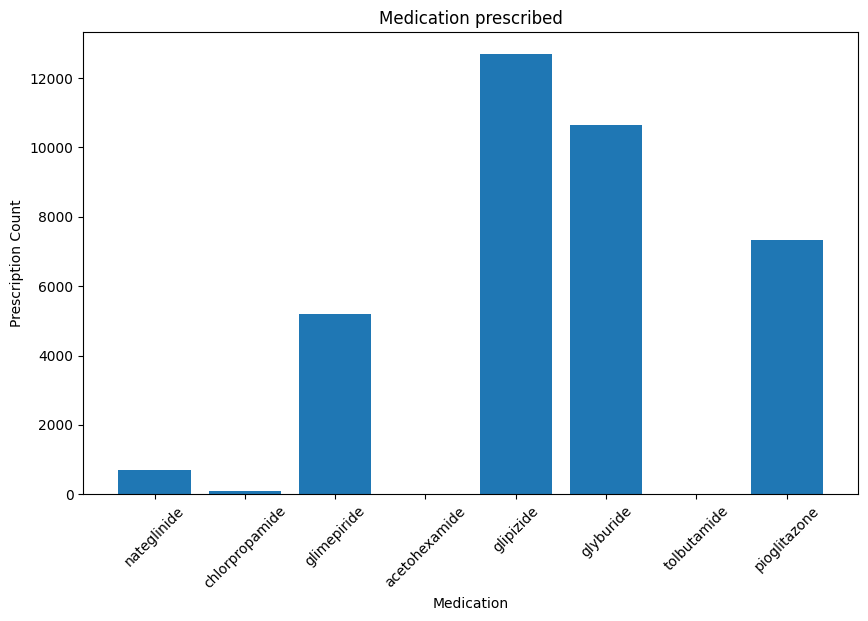

In [21]:
medication_usage = my_med.sum()
plt.figure(figsize=(10, 6))
plt.bar(medication_usage.index, medication_usage.values)
plt.xlabel('Medication')
plt.ylabel('Prescription Count')
plt.title('Medication prescribed')
plt.xticks(rotation=45)
plt.show()